<a href="https://colab.research.google.com/github/alidarvishh2492/HW_04/blob/main/HW_04_Darvish04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

In [36]:
ref = plt.imread('face_reference.jpg')
inp = plt.imread('face_input.jpg')

In [37]:
def to_gray(img):
  if img.ndim == 3:
    return img[...,0]*0.299 + img[...,1]*0.587 + img[...,2]*0.114
  else:
    return img

ref = to_gray(ref)
inp = to_gray(inp)

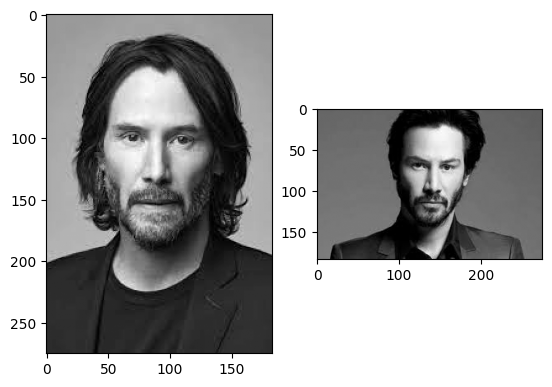

In [38]:
plt.subplot(1,2,1)
plt.imshow(ref, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(inp, cmap='gray')
plt.show()

In [39]:
target_shape = (250, 250)
ref_resized = resize(ref, target_shape)
inp_resized = resize(inp, target_shape)

MAE = np.mean(np.abs(ref_resized - inp_resized))
MSE = np.mean((ref_resized - inp_resized)**2)
print("Mean Absolute Error =", MAE)
print("Mean Squared Error =", MSE)

Mean Absolute Error = 58.10634790656479
Mean Squared Error = 4869.469404834705


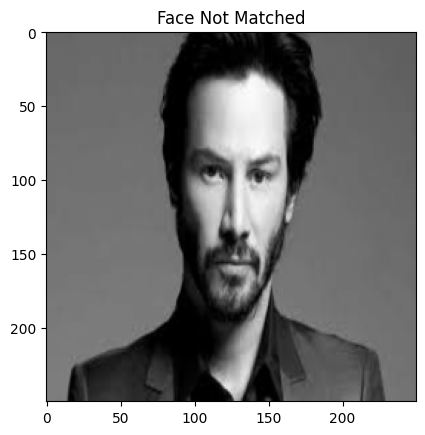

In [40]:
threshold = 0.01

result = "Face Matched" if MSE < threshold else "Face Not Matched"

plt.imshow(inp_resized, cmap='gray')
plt.title(result)
plt.show()

In [41]:
input_images = ["/content/face_input.jpg", "/content/1.jpg", "/content/2.jpg", "/content/3.jpg"]
results = []

for name in input_images:
    img = plt.imread(name)
    img = to_gray(img)
    img = resize(img, target_shape)
    MSE = np.mean((ref_resized - img)**2)
    results.append([name, MSE])

df = pd.DataFrame(results, columns=["Image", "MSE"])
print(df)


                     Image           MSE
0  /content/face_input.jpg   4869.469405
1           /content/1.jpg   5992.158930
2           /content/2.jpg   9241.344989
3           /content/3.jpg  16073.228361


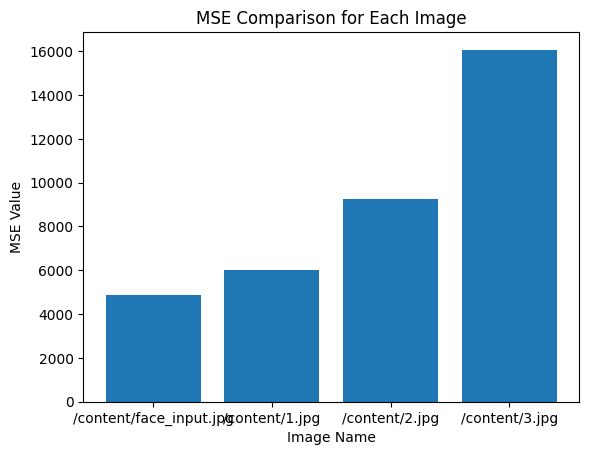

In [42]:
plt.bar(df["Image"], df["MSE"])
plt.title("MSE Comparison for Each Image")
plt.xlabel("Image Name")
plt.ylabel("MSE Value")
plt.show()